# 분류모델 간단 정리

기존 데이터 어떤 레이블에 속하는지 패턴을 알고리즘으로 학습한 뒤, 새로운 데이터에 대한 레이블을 판별하는 것

## 분류 평가 지표

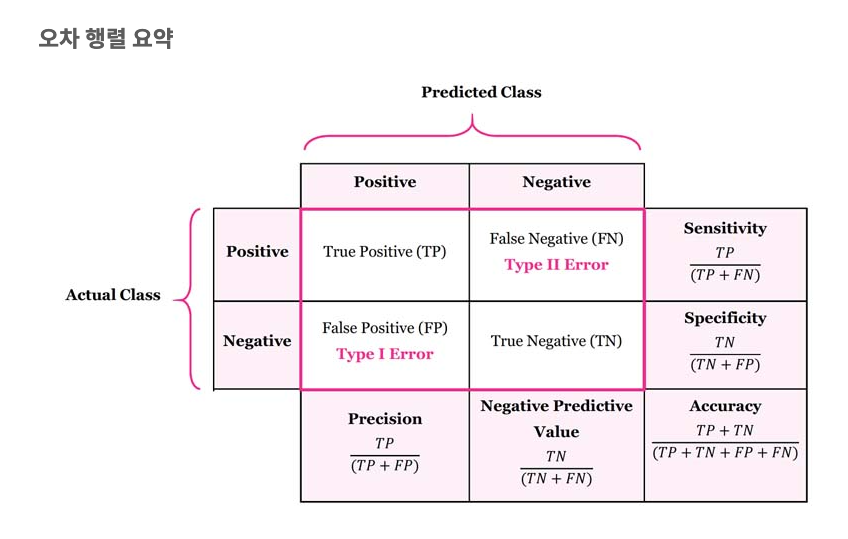

사진 출처 :https://koreapy.tistory.com/158

* 정확도: 실제 데이터가 예측 데이터와 얼마나 같은지를 판단하는 지표
* 정밀도: 예측을 positive로 한 대상 중 실제 positive로 로 일치한 데이터 비율
* 재현율: 실제 값이 positive인 대상 중 예측을 positive로 일치한 데이터 비율
* 정밀도/재현율의 트레이드오프: 재현율이 높아지면 정밀도는 낮아지고 재현율이 높아지면 정밀도는 높아짐
* F1스코어: 정밀도와 재현율을 이용한 지표- 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값
* ROC곡선: FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
* AUC: ROC곡선 아래의 면적

## 앙상블

여러 개의 분류기를 생성하고 그 예측 결과를 결합함으로써 보다 정확한 최종 예측 값 도출

* 보팅: 서로 다른 알고리즘을 가진 분류기가 예측한 값을 투표를 통해 결정
(하드보팅: 다수결의 법칙, 소프트보팅: 각 분류가 예측한 확률들을 평균- 일반적으로 더 우수)
* 배깅: 서로 같은 알고리즘을 가진 분류기가 예측한 값을 투표를 통해 결정
* 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하며 다음 분류기에(오분류된 데이터에) 가중치를 부여하면서 학습과 예측
* 스태킹: 여러 다른 모델의 예측 결과 값을 다시 학습 데이터로 만들어서 다른 모델로 재학습 후 예측

## Decision Tree

데이터에 있는 규칙을 학습을 통해 찾아내 트리(Tree)기반의 분류 규칙을 만드는 알고리즘

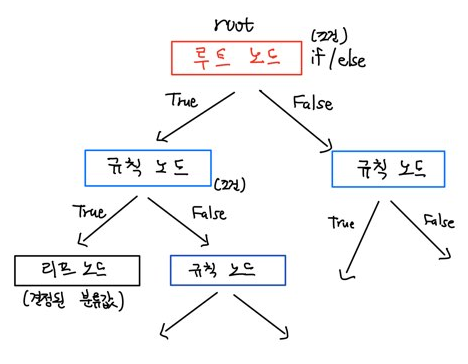

사진 출처 : https://blog.naver.com/teorw272/222082729148

* 루트 노드 : 결정 트리에서 최상위 노드
* 규칙 노드 : 규칙 조건이 표시된 노드
* 리프 노드 : 결정된 클래스 값이 표시된 노드
* 서브 트리 : 새로운 규칙 조건마다 생성된 트리

-> 많은 규칙은 트리를 복잡하게 만들어 과적합 발생하여 예측 성능 저하 -> 노드 분할 시 최대한 많은 데이터가 포함될 수 있는 규칙이 정해져야 함 -> 최대한 균일한 데이터셋 구성

##### 장점
* 정보의 균일도 기반으로 쉽고 직관적
* 일반적으로 스케일링, 정규화 불필요
* 시각화 가능
* 앙상블에서의 장점

##### 단점
* 트리 깊이가 깊어지면 과적합 발생
* 한 번에 한 가지 변수만 고려해 변수간 상호작용 파악 어려움

균일도:  데이터 셋 안의 데이터 정보가 들쭉날쭉 하지 않고 일정하게 구성되어 있는 정도
* 데이터를 구분하는 데 필요한 정보의 양에 영향을 줌
* 규칙노드는 정보 균일도가 높은 데이터셋을 먼저 선택할 수 있도록 규칙 조건을 만듦

균일도 측정방법
* 엔트로피 지수: 주어진 데이터 집합의 혼잡도
* 정보 이득 지수: 1- 엔트로피 지수, 정보 이득 지수가 높은 속성 기준으로 분할
* 지니 계수: 0이 평등, 1 불평등, 지니 계수가 낮은 속성을 기준으로 분할

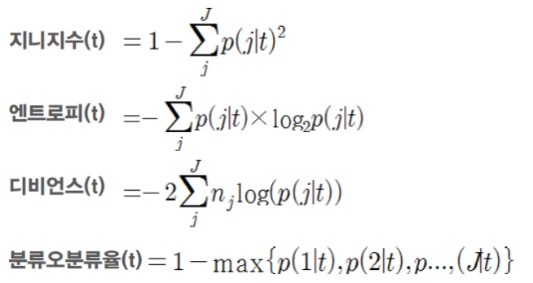

사진 출처: http://www.jangun.com/study/DataMining.html

결정트리 파라미터
* min_samples_split: 노드 분할을 위한 최소 샘플 데이터 수(2가 디폴트)
* min_samples_leaf : 리프 노드의 최소한 샘플 데이터 수 (1이 디폴트)
* max_dept: 트리의 최대 깊이 규정 (none 디폴트)
* max_leaf_nodes: 리프 노드의 최대 개수
* max_features: 최적의 분할을 위한 최대 피처 개수(none 디폴트 - 모든피처 사용)

## Random Forest

부트스트랩: 주어진 데이터가 모집단을 대표하는 독립 표본이라 가정하고, 그 자료로부터 중복을 허용한 무작위 추출을 하는 기법

배깅: 부트스트랩(bootstrap)+ 결합(aggregating)의 약자
* 배깅의 대표적인 알고리즘: 랜덤 포레스트

Random Forest: 부트스트랩 샘플로 만든 다수의 결정 트리들로 분류 결과를 취합해서 예측하는 앙상블 모델

다수의 결정트리가 모여 랜덤 포레스트 구성, 설명변수도 무작위로 선택

##### 장점
* 앙상블 알고리즘 중 비교적 빠른 수행 속도
* 기본 결정트리보다 일반화
* 시각화 가능

##### 단점
* 하이퍼 파라미터 많음
* 튜닝 시 오랜 시간

배깅 VS Random Forest: 배깅은 모든 피처 사용, 랜덤포레스트는 임의로 선정한 개수 고려

## ---- 부스팅의 기본 알고리즘: AdaBoost, AdaBoost에서 발전: GradientBoost, GBM에서 발전: XGBoost, LightGBM, CatBoost, NGBoost 등 ----

## AdaBoost

Tree가 아닌 Stump로 이루어져 있는 부스팅 기법
* Stump: 하나의 루트 노드에 두개의 리프노드를 가진 형태의 트리

Random Forest VS AdaBoost

* Random Forest: 여러 개의 트리 모델, 트리마다 동일한 가중치
* AdaBoost: 여러개의 stump모델, stump마다 다른 가중치, 순차적으로 stump 생성

### 작동원리
1. 입력변수 개수만큼 Stump 생성 - 분할은 decision tree 분리 기준에 따라 
2. Stump마다 지니 계수 구하기
3. Gini impurity가 가장 작은 Stump를 첫 Stump로 선정
4. Total Error & Amount of say 구하기
5. Amount of say를 이용해 가중치 업데이트 ( new sample weight = sample weight *e^amount of say)
6. 가중치를 다 더했을 때 1이 되도록 정규화 시키기
7. 업데이트 된 가중치를 이용해 새로운 데이터셋 생성
8. 생성된 새로운 데이터셋으로 앞의 과정 반복

* Total Error: 오분류된 데이터들의 sample weight총 합 (오분류된 데이터 수/ 전체 데이터 수)
* Amount of say: 해당 stump가 최종 분류에 있어서 얼마나 영향을 주는지를 수치화한 값

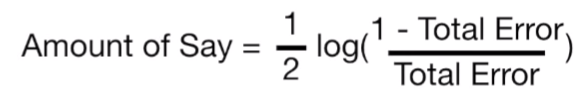

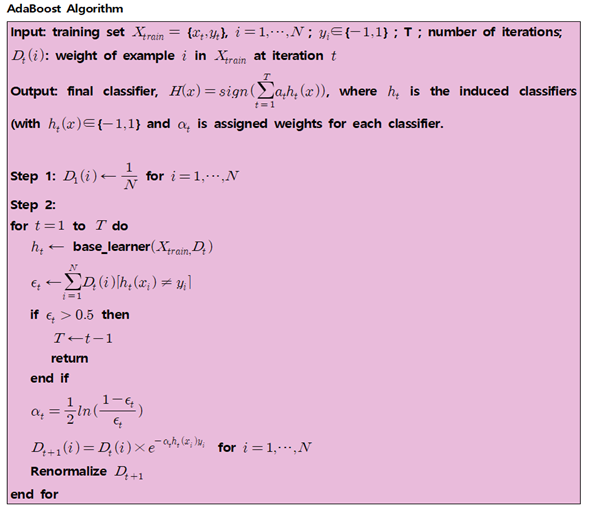

사진 출처: https://blog.naver.com/ollehw/222095641928

오분류된 데이터에 더욱 집중한 데이터셋으로 학습을 반복하면서 오류를 줄여나감

## GradientBoost(GBM)

Single leaf로 된 모델을 시작으로, 경사하강법을 활용해 오류를 줄여 나가는 부스팅 기법

## XGBoost

## CatBoost

## Logistic Regression

선형 회귀 방식을 분류에 적용한 모델

## NaiveBayes

## SVM

## KNN

## 판별분석(LDA, QDA)